# HDB Dataset no. 2: Demand for Sale and Rental HDB Flats

## 0. setup

In [1]:
# Packages used
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Numpy Dtypes
# ===========
# https://www.numpy.org/devdocs/user/basics.types.html

#   a) b1, i1, i2, i4, i8, u1, u2, u4, u8, f2, f4, f8, c8, c16, a<n>
#   (representing bytes, ints, unsigned ints, floats, complex and
#    fixed length strings of specified BYTE lengths)

#   b) int8,...,uint8,...,float16, float32, float64, complex64, complex128
#   (this time with BIT sizes)

#c) for strings: str,size # if size !specified, default is 0 len
#   or np.unicode, size


# Functions

In [3]:
def isNumeric(obj):
    try:
        obj + 0 #  chk if object capable of doing math operations, e.g. + 0 
        return True
    except TypeError:
        return False

def getMode(modeDict):
    '''
    Input Parameter:
       modeDict -> a dictionary containing key (categories) and values (frequency count)
       
    Returns:
       . a tuple containing
       ... a list containing >=1 keys (categories)
       ... a var containing a value (the frequency count of the key/s)
       ...... this frequency count is the same for all keys, if > key
       ...... because single or multi-mode, all have the same freq count
       
       Mode -
       . if all numbers have same frequency, there is NO mode
       . if sum(modeDict values) == len(modeDict), there is no mode     
       . there can be more than one mode - i.e. multimode

    '''
    
    lModeK = []
    modeV = 0
    
    if len(modeDict) == 0: print('modeDict must have at least One entry!'); return (lModeK, modeV)    
    
    for k,v in modeDict.items():
        if len(modeDict) > 1:
            if v > modeV:
                # remove existing mode/s
                lModeK.clear()                
                # input the new mode
                lModeK.append(k)
                modeV = v
            elif v == modeV:
                lModeK.append(k)
            # if v < modeV, do nothing, the existing mode/s are still the same
        else:
            lModeK.append(k)
            modeV = v
    
    return (lModeK, modeV)    
    

##  1. Load Dataset
https://docs.scipy.org/doc/numpy/user/basics.rec.html

. genfromtxt() creates a structured/field numpy array

In [4]:
filePath = 'Data\Dd_Rental_and_Sold_Flats'
fileName = 'Dd_Rental_and_Sold_Flats.csv'
filePathName = os.path.join(filePath, fileName) # this should work on both windows and linux

# nb: A 'standard' numpy array can only have one dtype, genfromtext actually returns a structured array
# which can hold multiple dtypes
# https://docs.scipy.org/doc/numpy/user/basics.rec.html

npData = np.genfromtxt(filePathName, delimiter=',',skip_header=1,                        
                       dtype=[('startYear',np.int32),('endYear',np.int32),
                             ('flatType',np.unicode,24),('demand',np.int32)], 
                       missing_values=['na','-'],filling_values=0, autostrip=True)
                      

print('type(npData) is {}:'.format(type(npData)))
print('npData.shape is {}:'.format(npData.shape))

print()
print('"{}" is of type {}'.format(npData['startYear'][0], type(npData['startYear'][0])))
print('"{}" is of type {}'.format(npData[0][0], type(npData[0][0])))
print()

print()
# [col] [row] 
print('"{}" is of type {}'.format(npData['endYear'][4], type(npData['endYear'][4])))
# [row] [col]
print('"{}" is of type {}'.format(npData[4][1], type(npData[4][1])))
print()

print()
# [col] [row] 
print('"{}" is of type {}'.format(npData['flatType'][0], type(npData['flatType'][0])))
# [row] [col]
print('"{}" is of type {}'.format(npData[0][2], type(npData[0][2])))
print()

print()
# [col] [row] 
print('"{}" is of type {}'.format(npData['demand'][-1], type(npData['demand'][-1])))
# [row] [col]
print('"{}" is of type {}'.format(npData[-1][3], type(npData[-1][3])))
print()


# a.sort(order='y') -> sort on single field, later on, test if a.sort(order = ['x','y','z']) works

print('\nPeek at first 5 records to see if anything wrong...')
for i in range(5):
    print(npData[i])

# chk 5 random records
# numpy.random.randint(low, high=None, size=None, dtype='l')
print('\nInspect 5 random records...')
for i in range(5):
    print(npData[np.random.randint(6,len(npData))])
   
print('\nPeek at last 5 records to see if anything wrong...')
for i in range(-5,0): # same as reversed(range(-1,-6,-1))
    print(npData[i])



type(npData) is <class 'numpy.ndarray'>:
npData.shape is (26,):

"1960" is of type <class 'numpy.int32'>
"1960" is of type <class 'numpy.int32'>


"1975" is of type <class 'numpy.int32'>
"1975" is of type <class 'numpy.int32'>


"rental_flats" is of type <class 'numpy.str_'>
"rental_flats" is of type <class 'numpy.str_'>


"27547" is of type <class 'numpy.int32'>
"27547" is of type <class 'numpy.int32'>


Peek at first 5 records to see if anything wrong...
(1960, 1965, 'rental_flats', 52408)
(1960, 1965, 'home_ownership_flats', 2967)
(1966, 1970, 'rental_flats', 66005)
(1966, 1970, 'home_ownership_flats', 40013)
(1971, 1975, 'rental_flats', 57034)

Inspect 5 random records...
(1991, 1995, 'rental_flats', 39200)
(2011, 2014, 'rental_flats', 18417)
(2016, 2016, 'home_ownership_flats', 27547)
(1996, 2000, 'home_ownership_flats', 129904)
(1986, 1990, 'home_ownership_flats', 194206)

Peek at last 5 records to see if anything wrong...
(2011, 2014, 'home_ownership_flats', 114207)
(2011, 2015,

## 2. Preprocessing - Clean / Transform

In [5]:
# info:
# ======================
# https://towardsdatascience.com/data-preprocessing-for-non-techies-feature-exploration-and-engineering-f1081438a5de
# https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa
# https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
# https://scikit-learn.org/stable/modules/preprocessing.html
# ======================

# check if there are missing values
for field in npData.dtype.names:
    if str(npData[field][0]).isnumeric():        
        if True in np.isnan(npData[field]):
            print('Column "{}": \tNaN is found!'.format(field))    
        else:
            print('Column "{}": \tNo NaN found'.format(field))    
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html
        # np.isnan returns results in an array. In future, use this to show location of NaN
        # and create a simple tKinter or pyQT utility to interactively 'fix' NaNs or blanks etc
    else:
        blankFound = False
        for idx in range(len(npData[field])):
            if npData[field][idx] == '':
                print('Blank is found')
                blankFound = True
        print('Column "{}": \tBlank found == {}'.format(field, blankFound))
            
       



Column "startYear": 	No NaN found
Column "endYear": 	No NaN found
Column "flatType": 	Blank found == False
Column "demand": 	No NaN found


## 3. Exploratory Data Analysis
https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.statistics.html

npData ->
dtype=[('quarter',np.unicode,16),('town',np.unicode,16),
                             ('flatType',np.unicode,16),('price',np.float32)], 

In [6]:
print('There are {} rows and {} columns in this dataset'.format(len(npData),len(npData.dtype.names)))

print()

print('The names of the columns are:')
for idx in range(len(npData.dtype.names)):
    print("- {:<10s} {} \tisnumeric: {}".format(npData.dtype.names[idx],type(npData[0][idx]),isNumeric(npData[0][idx])))

print()
    
for idx in range(len(npData.dtype.names)):    
    print('{:<6} unique values in {:<9s} column'.format(len(np.unique(npData[npData.dtype.names[idx]])),npData.dtype.names[idx]))    
    
print('\nColumn "flatType" has 2 unique values, which is correct i.e. \n\
"rental_flats" and "home_ownership_flats"')
print('\nColumn "demand" has 26 unique values, which is probably correct. We cannot make')
print('a conclusion, because demand number can be duplicated, although in this case, it')
print('will be rare.')
print('\nThe number of unique values in startYear and endYear should be the same, but it is not')
print('As there are 26 rows of which every two rows are duplicated, there should be 26/2 unique values.')
print('On checking the csv, the following error is found')
print ('\t2011	2014	rental_flats	18417')
print ('\t2011	2014	home_ownership_flats	114207')
print ('\t2011	2015	rental_flats	22726')
print ('\t2011	2015	home_ownership_flats	136486')
print('\nAs both the startYear and endYear are in 5 year intervals, on visual checking')
print('the CSV, beyond the above, more errors are found.')
print('\nCorrective Action follows:')

npData['startYear'][0] = 1961
print("npData['startYear'][0] = 1961")
npData['startYear'][1] = 1961
print("npData['startYear'][1] = 1961")
npData['startYear'][-4] = 2016
print("npData['startYear'][-4] = 2016")
npData['startYear'][-3] = 2016
print("npData['startYear'][-3] = 2016")
npData['startYear'][-2] = 2021
print("npData['startYear'][-2] = 2021")
npData['startYear'][-1] = 2021
print("npData['startYear'][-1] = 2021")

npData['endYear'][-6] = 2015
print("npData['endYear'][-6] = 2015")
npData['endYear'][-5] = 2015
print("npData['endYear'][-5] = 2015")
npData['endYear'][-4] = 2020
print("npData['endYear'][-4] = 2020")
npData['endYear'][-3] = 2020
print("npData['endYear'][-3] = 2020")
npData['endYear'][-2] = 2025
print("npData['endYear'][-2] = 2025")
npData['endYear'][-1] = 2025
print("npData['endYear'][-1] = 2025")

print('\nRevised npData is ---> \n{}'.format(npData))
print('len of npData is: {}'.format(len(npData)))

print('\nHowever, it is not possible for demand to be recorded from the years that have not occurred')
print('e.g. 2019, 2020 etc. Also, the 5 year period from 2016 is not yet completed.')
print('Hence, if we take the starting year of 1961 to be correct, then we should remove the following:')
# np.delete(arr, 1, 0) # array, index, axis
for i in range(4):
    npData = np.delete(npData,-1,0)
    print('npData = np.delete(npData,-1,0)')

print('\nCorrected npData is ---> \n{}'.format(npData))
print('len of npData is: {}'.format(len(npData)))


There are 26 rows and 4 columns in this dataset

The names of the columns are:
- startYear  <class 'numpy.int32'> 	isnumeric: True
- endYear    <class 'numpy.int32'> 	isnumeric: True
- flatType   <class 'numpy.str_'> 	isnumeric: False
- demand     <class 'numpy.int32'> 	isnumeric: True

12     unique values in startYear column
13     unique values in endYear   column
2      unique values in flatType  column
26     unique values in demand    column

Column "flatType" has 2 unique values, which is correct i.e. 
"rental_flats" and "home_ownership_flats"

Column "demand" has 26 unique values, which is probably correct. We cannot make
a conclusion, because demand number can be duplicated, although in this case, it
will be rare.

The number of unique values in startYear and endYear should be the same, but it is not
As there are 26 rows of which every two rows are duplicated, there should be 26/2 unique values.
On checking the csv, the following error is found
	2011	2014	rental_flats	18417
	2


### 3a. Five Number Summary and Box Plot

In [7]:
# print(npData.dtype.names)
npData_Rental        = npData[npData['flatType']== 'rental_flats']
npData_HomeOwnership = npData[npData['flatType']== 'home_ownership_flats']


print('\nFive Number Summary for Rental Flats from 1961 to 2015:')
print('===========================================================')
# Mean
print("Rental Flats: Arithematic Mean   \t= {:10,.0f}".format(np.mean(npData_Rental['demand'])))

# Median 
print("Rental Flats: Median \t\t\t= {:10,.0f}".format(np.median(npData_Rental['demand'])))

# Min
print("Rental Flats: Min \t\t\t= {:10,.0f}".format(np.min(npData_Rental['demand'])))

# Max 
print("Rental Flats: Max \t\t\t= {:10,.0f}".format(np.max(npData_Rental['demand'])))

# Mode
print('Sample size too small, mode is not meaningful\n')

print('\nFive Number Summary for Home Ownership Flats from 1961 to 2015:')
print('===================================================================')
# Mean
print("Home Onwership : Arithematic Mean   \t= {:10,.0f}".format(np.mean(npData_HomeOwnership['demand'])))

# Median 
print("Home Onwership : Median \t\t= {:10,.0f}".format(np.median(npData_HomeOwnership['demand'])))

# Min
print("Home Onwership : Min \t\t\t= {:10,.0f}".format(np.min(npData_HomeOwnership['demand'])))

# Max 
print("Home Onwership : Max \t\t\t= {:10,.0f}".format(np.max(npData_HomeOwnership['demand'])))

# Mode
print('Sample size too small, mode is not meaningful')




Five Number Summary for Rental Flats from 1961 to 2015:
Rental Flats: Arithematic Mean   	=     37,011
Rental Flats: Median 			=     38,628
Rental Flats: Min 			=     15,995
Rental Flats: Max 			=     66,005
Sample size too small, mode is not meaningful


Five Number Summary for Home Ownership Flats from 1961 to 2015:
Home Onwership : Arithematic Mean   	=    125,065
Home Onwership : Median 		=    123,213
Home Onwership : Min 			=      2,967
Home Onwership : Max 			=    308,454
Sample size too small, mode is not meaningful


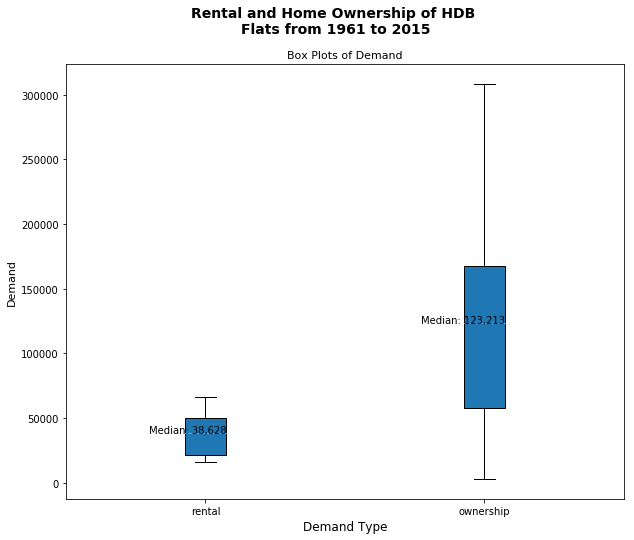

In [8]:
print()
# Box Plot
boxPlotData = npData_Rental['demand']
boxPlotData = boxPlotData.reshape(len(boxPlotData),1)
npTemp = npData_HomeOwnership['demand']
npTemp = npTemp.reshape(len(npTemp),1)

# numpy.append(arr, values, axis=None)
boxPlotData = np.append(boxPlotData,npTemp, axis=1)
del npTemp

labels = np.array(['rental','ownership'])

# figure related code
fig = plt.figure(figsize=(10,8))
fig.suptitle('Rental and Home Ownership of HDB \nFlats from 1961 to 2015', fontsize=14, fontweight='bold')

bplot = plt.boxplot(boxPlotData,labels=labels, patch_artist=True, vert=True)

# plot related
plt.title('Box Plots of Demand', fontsize = 11)
plt.xlabel('Demand Type',fontsize = 12)
plt.ylabel("Demand",fontsize = 11)

#plt.xticks(rotation=30)
#plt.xticks(teams, ('Team 1', 'Team 2', 'Team 3'))
#plt.yticks(np.arange(0, 50, 10))


for line in bplot['medians']:
    #print(line)
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, 'Median: {:,.0f}'.format(y),
             horizontalalignment='right',fontsize=10,color='black') # draw above, centered, Median:{:.1f}

fliers = []
for line in bplot['fliers']:
    ndarray = line.get_xydata()
    #print(ndarray)
    if (len(ndarray)>0):
       max_flier = ndarray[:,0].max()
       max_flier_index = ndarray[:,0].argmax()
       x = ndarray[max_flier_index,0] #where to plot the flier text in x position
       y = ndarray[max_flier_index,1] #where to plot the flier text in y position
       #print("Flier: " + str(y) + "," + str(max_flier))      
       plt.text(x,y,'{:,.0f}'.format(int(y)),horizontalalignment='right',fontsize=9,color='red') 

plt.show()


### 3c. Visualisation - Scatter Plot

In [9]:

z = np.array([npData_HomeOwnership['demand'],npData_Rental['demand']])
z = z.T

# https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column
z = z[z[:,0].argsort()] # sort column 0 only, col 1 tags along with changes in col 0
x = z[:,0]
y = z[:,1]




Question: Does increase or decrease of 'home ownership' demand affect 'rental' demand?



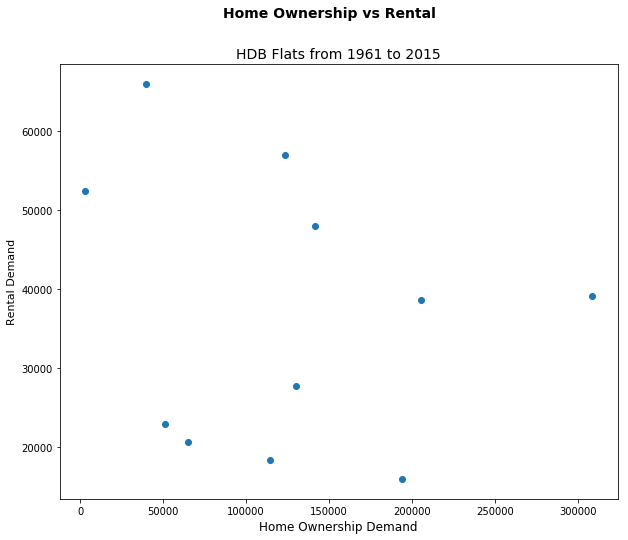

Visually looking at the scatter plot, Home Ownership does not seem to have any correlation with Rental.

In addition, Pearson product-moment correlation coefficients 'r' = -0.196 which is very
close to 0 and we cannot conclude that there is evidence of correlation between
'Home Ownership demand' and 'Rental Demand'


In [10]:
# Scatter Plot & r coefficient(?)
# =============
# x-Axis --> home_ownership_flats (independent variable)
# y-Axis --> rental_flats (dependent variable)
# Does increase or decrease of 'home ownership'demand affect 'rental' demand?

# --- Data
# test data
#x = [2967,27547,40013,51052,64767,114207,123213,129904,136486,141430,194206,205502,308454]
#y = [52408,4336,66005,22968,20725,18417,57034,27787,22726,47958,15995,38628,39200]

# actual data
z = np.array([npData_HomeOwnership['demand'],npData_Rental['demand']])
z = z.T

# https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column
z = z[z[:,0].argsort()] # sort column 0 only, col 1 tags along with changes in col 0
x = z[:,0]
y = z[:,1]

# --- Figure related code
print()
print("\nQuestion: Does increase or decrease of 'home ownership' demand affect 'rental' demand?\n")
fig = plt.figure(figsize=(10,8))
fig.suptitle('Home Ownership vs Rental', fontsize=14, fontweight='bold')

plt.scatter(x,y)

# plot related
plt.title('HDB Flats from 1961 to 2015', fontsize = 14)
plt.xlabel('Home Ownership Demand',fontsize = 12)
plt.ylabel("Rental Demand",fontsize = 11)

#plt.xticks(rotation=30)
#plt.xticks(teams, ('Team 1', 'Team 2', 'Team 3'))
#plt.yticks(np.arange(0, 50, 10))

plt.show()

print('Visually looking at the scatter plot, Home Ownership does not seem to have any correlation with Rental.')

# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html
# numpy.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)
# https://stackoverflow.com/questions/3425439/why-does-corrcoef-return-a-matrix
r = np.corrcoef(x,y)
print("\nIn addition, Pearson product-moment correlation coefficients 'r' = {:.3} which is very".format(r[0][1]))
print('close to 0 and we cannot conclude that there is evidence of correlation between')
print("'Home Ownership demand' and 'Rental Demand'" )

### 3b. Visualisation - Histogram

In [42]:
npDataRental_Dd = npData[npData['flatType']=='rental_flats']['demand']
npDataOwner_Dd = npData[npData['flatType']=='home_ownership_flats']['demand']
print(npDataOwner_Dd)
print()
print(npDataRental_Dd)
#print(len(npData_Rental))
print()
#print(len(npData_Owner))


[  2967  40013 123213 141430 205502 194206 308454 129904  51052  64767
 114207]

[52408 66005 57034 47958 38628 15995 39200 27787 22968 20725 18417]



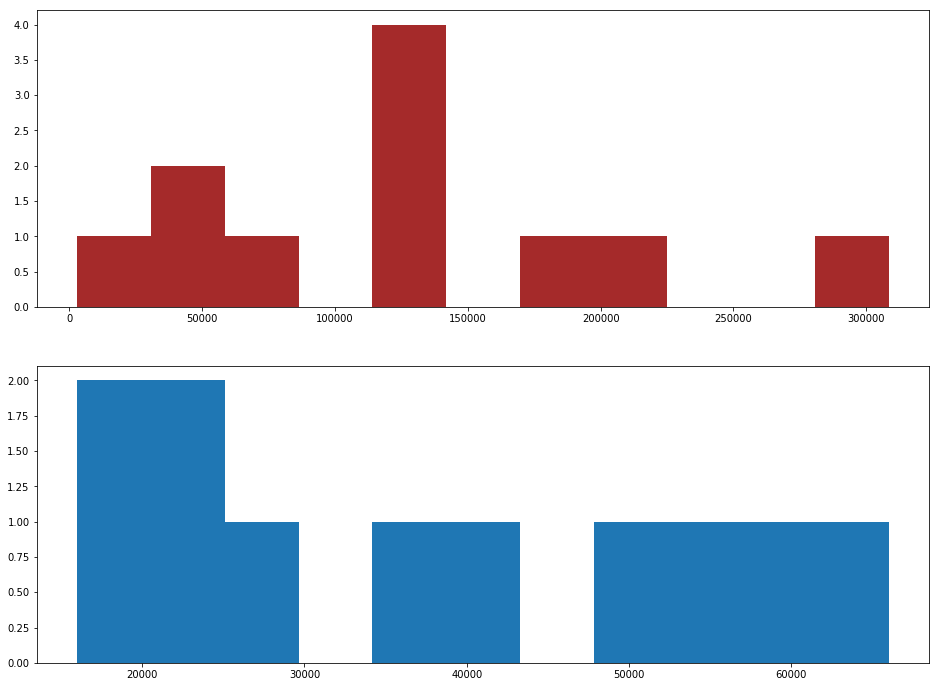


	Both the 'owner' and 'rental' flat types do not show a continuous distribution,
	perhaps this is because sample size n = 11 is too small.



In [79]:
# Histogram
# https://statistics.laerd.com/statistical-guides/understanding-histograms.php
# https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart/#58c8e78e6d77

# each 5 year period is a bin
# show 1 plot for ownership, and plot#2 for rental

# Data
# ====
npDataOwner_Dd = npData[npData['flatType']=='home_ownership_flats']['demand']
npDataRental_Dd = npData[npData['flatType']=='rental_flats']['demand']
#t1 = np.random.randn(1000) # test data only


#Create a multi-plot by first declaring the figure with a unique reference number, then  the subplot method with a unique reference number, followed by the plot method
fig1 = plt.figure(1)
fig1.set_figheight(12)
fig1.set_figwidth(16)


#subplot(nrows, ncols, plot_number)
plt211 = plt.subplot(211)  # 2 rows, 1 col, plot #1
plt211.hist(npDataOwner_Dd, color = 'brown', bins = len(npDataOwner_Dd))


plt212 = plt.subplot(212)  # 2 rows, 1 col, plot #2
plt212.hist(npDataRental_Dd, bins = len(npDataRental_Dd))

# show
plt.show()

print("\n\tBoth the 'owner' and 'rental' flat types do not show a continuous distribution,")
print("\tperhaps this is because sample size n = 11 is too small.\n")

